In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import os

In [28]:
csv_files = glob.glob('./selected_indicators/*_ind.csv')

In [29]:
brazil_data_list = []

for file in csv_files:
    df = pd.read_csv(file)
    df_new = (
        df.drop(['code', 'iso'], axis=1)
        .set_index(['country']).rename_axis([None])
        .T.reset_index()  # Transpose teh original dataset
        .assign(index=lambda x: x['index'].str[-4:])
        .set_index('index')
        .rename_axis(None)
        .replace(-8888, np.nan)
    )

    df_long = (df_new.reset_index()
               .melt(id_vars='index', var_name='country', value_name='value')
               .astype({'index': 'float64'}))
    brazil_data = df_long[df_long['country'] == 'Brazil'].copy()


    indicator_name = os.path.splitext(os.path.basename(file))[0]
    brazil_data.loc[:,'indicator'] = indicator_name

    brazil_data_list.append(brazil_data)

brazil_data_all_indicators = pd.concat(brazil_data_list)

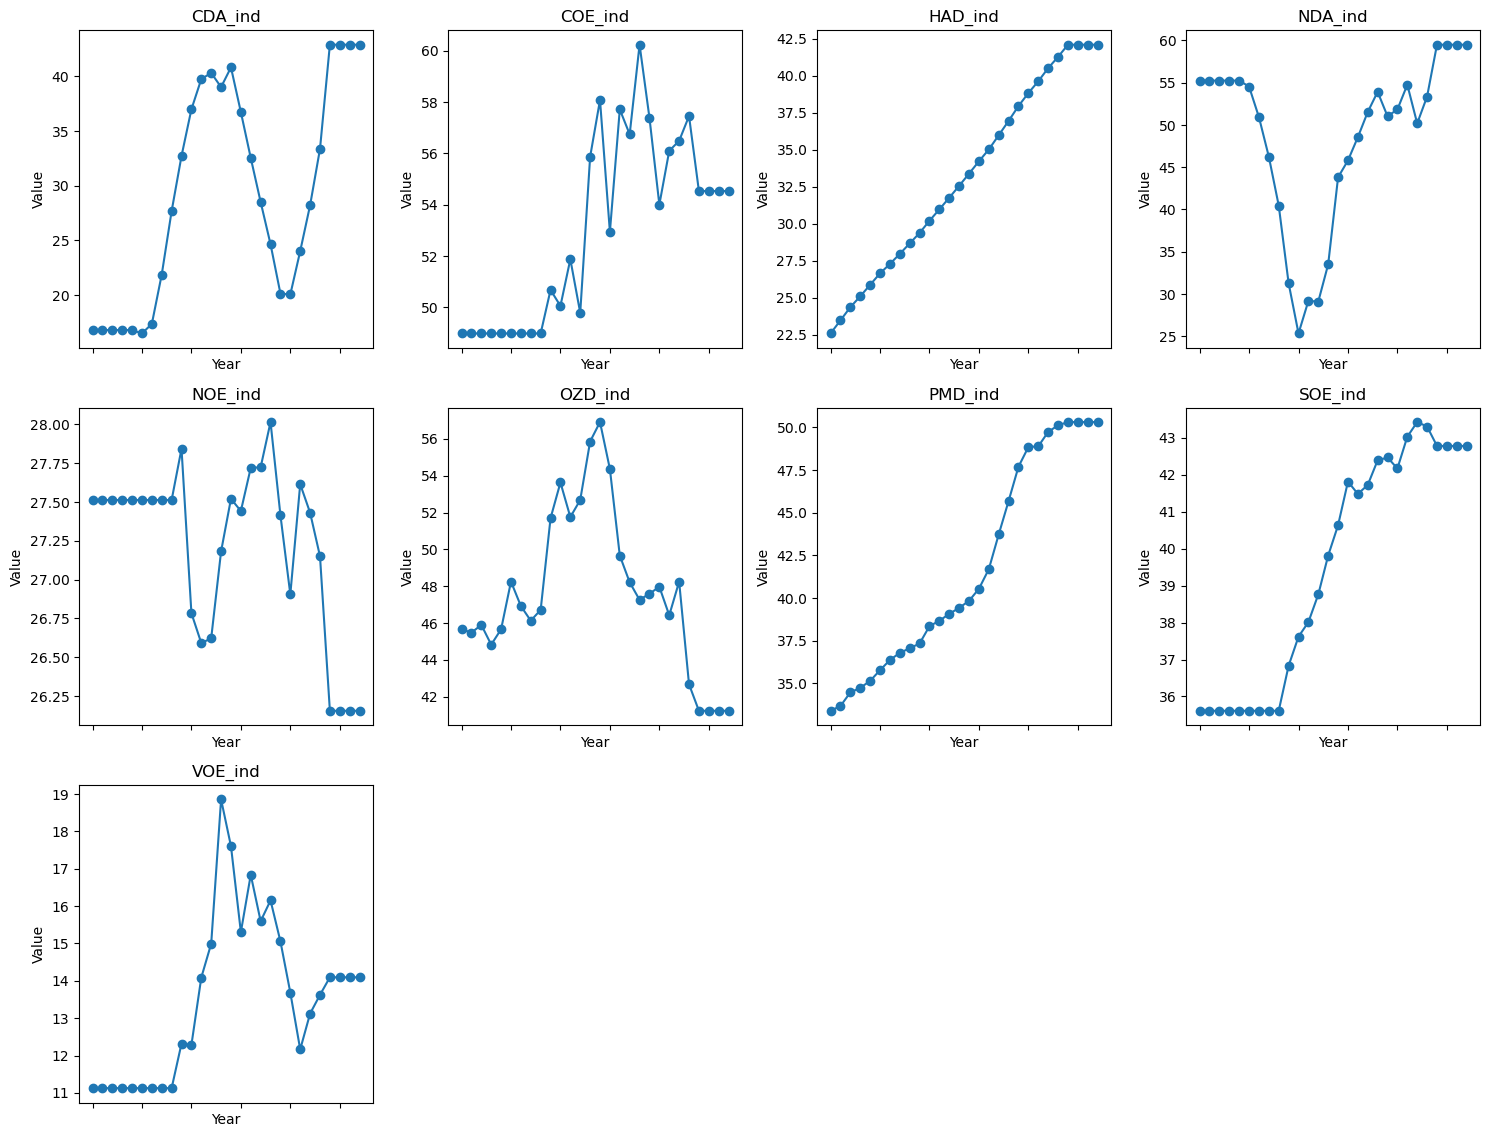

In [30]:
rows = 4
cols = 4
num_plots = rows * cols
num_pages = math.ceil(len(brazil_data_all_indicators['indicator'].unique()) / num_plots)

for page in range(num_pages):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15), sharex=True, sharey=False)
    axes = axes.flatten()

    for idx, (indicator, data) in enumerate(brazil_data_all_indicators.groupby("indicator")):
        if page * num_plots <= idx < (page + 1) * num_plots:
            ax = axes[idx % num_plots]
            ax.plot(data["index"], data["value"], marker="o", label=indicator)
            ax.set_title(indicator)
            ax.set_xlabel("Year")
            ax.set_ylabel("Value")

    for i in range(idx % num_plots + 1, num_plots):
        fig.delaxes(axes[i])

        fig.tight_layout()
    plt.savefig(f"brazil_data_page_{page + 1}.png")

plt.show()